# Read Peptide Output
Formatted for input into MsStats

In [1]:
from pathlib import Path

import acore.differential_regulation
import numpy as np
import pandas as pd
import plotly.express as px

## Read in the data
- `file_in`: input file with the quantified peptide data in MSstats format as provided by quantms

The file can be downloaded from [Google Drive](https://drive.google.com/drive/folders/1Nm5Ha-tCvjU-B323BLhna1GwHdNpK_lU?usp=drive_link)

In [2]:
file_in = "data/PXD040621/processed/PXD040621.sdrf_openms_design_msstats_in.csv"
df = pd.read_csv(file_in, sep=",", header=0)  # .set_index([])
df.head()

,ProteinName,PeptideSequence,PrecursorCharge,FragmentIon,ProductCharge,IsotopeLabelType,Condition,BioReplicate,Run,Intensity,Reference
0,sp|P00959|SYM_ECOLI,AAAAPVTGPLADDPIQETITFDDFAK,2,NaN,0,L,Control,1,1,"201,065,600.000",20220830_JL-4884_Forster_Ecoli_DMSO_rep1_EG-1....
1,sp|P00959|SYM_ECOLI,AAAAPVTGPLADDPIQETITFDDFAK,2,NaN,0,L,Control,2,2,"74,844,780.000",20220830_JL-4884_Forster_Ecoli_DMSO_rep2_EG-2....
2,sp|P00959|SYM_ECOLI,AAAAPVTGPLADDPIQETITFDDFAK,2,NaN,0,L,Control,3,3,"67,591,410.000",20220830_JL-4884_Forster_Ecoli_DMSO_rep3_EG-3....
3,sp|P00959|SYM_ECOLI,AAAAPVTGPLADDPIQETITFDDFAK,2,NaN,0,L,Control,4,4,"76,388,800.000",20220830_JL-4884_Forster_Ecoli_DMSO_rep4_EG-4....
4,sp|P00959|SYM_ECOLI,AAAAPVTGPLADDPIQETITFDDFAK,2,NaN,0,L,Sulforaphane,5,5,"116,247,100.000",20220830_JL-4884_Forster_Ecoli_Suf_rep1_EG-5.mzML


define the output folder for our VueGen report which we will create later

In [3]:
out_dir = "data/PXD040621/report/"
out_dir = Path(out_dir)
out_dir.mkdir(parents=True, exist_ok=True)

We have the following columns in the data:

```python
cols = [
    "ProteinName",
    "PeptideSequence",
    "PrecursorCharge",
    "FragmentIon",
    "ProductCharge",
    "IsotopeLabelType",
    "Condition",
    "BioReplicate",
    "Run",
    "Intensity",
    "Reference",
]

## Log2 transform the intensity values
- log2 transformations are common for lognormal distributed data

In [4]:
df["Intensity"] = np.log2(df["Intensity"].astype(float))

## Aggregate the peptide intensities to protein intensities
- we use the median of the peptide intensities for each protein

There are more sophisticated ways to do this, e.g. using MaxLFQ, iBAQ, FlashLFQ, DirectLFQ, etc.

In [5]:
proteins = (
    df.groupby(["ProteinName", "Reference"])["Intensity"].median().unstack(level=0)
)
proteins

ProteinName,CON_A2AB72,CON_O76013,CON_P00761,CON_P01966,CON_P02070,CON_P02533,CON_P02538,CON_P02662,CON_P02663,CON_P02666,...,sp|Q47319|TAPT_ECOLI,sp|Q47536|YAIP_ECOLI,sp|Q47622|SAPA_ECOLI,sp|Q47679|YAFV_ECOLI,sp|Q47710|YQJK_ECOLI,sp|Q57261|TRUD_ECOLI,sp|Q59385-2|COPA_ECOLI,sp|Q59385|COPA_ECOLI,sp|Q7DFV3|YMGG_ECOLI,sp|Q93K97|ADPP_ECOLI
Reference,,,,,,,,,,,,,,,,,,,,,
20220830_JL-4884_Forster_Ecoli_DMSO_rep1_EG-1.mzML,NaN,NaN,31.056,NaN,26.929,28.336,25.828,NaN,26.804,NaN,...,NaN,NaN,25.638,NaN,27.038,28.411,23.555,27.640,28.513,27.223
20220830_JL-4884_Forster_Ecoli_DMSO_rep2_EG-2.mzML,23.997,25.647,29.515,25.711,NaN,25.595,26.210,NaN,27.593,NaN,...,NaN,NaN,NaN,NaN,26.841,27.941,25.240,27.244,27.621,25.331
20220830_JL-4884_Forster_Ecoli_DMSO_rep3_EG-3.mzML,NaN,NaN,33.670,NaN,NaN,26.992,25.441,28.129,28.895,27.111,...,NaN,NaN,24.576,NaN,26.609,27.070,NaN,27.525,27.679,24.399
20220830_JL-4884_Forster_Ecoli_DMSO_rep4_EG-4.mzML,NaN,NaN,34.139,NaN,NaN,27.205,26.093,NaN,27.764,NaN,...,NaN,NaN,25.945,23.902,27.164,26.680,22.524,27.404,27.256,25.767
20220830_JL-4884_Forster_Ecoli_Suf_rep1_EG-5.mzML,NaN,NaN,34.541,NaN,NaN,NaN,24.442,NaN,25.938,NaN,...,NaN,NaN,25.836,NaN,26.819,27.995,NaN,27.499,28.090,25.956
20220830_JL-4884_Forster_Ecoli_Suf_rep2_EG-6.mzML,NaN,NaN,33.175,NaN,26.571,26.495,25.070,NaN,NaN,NaN,...,NaN,NaN,NaN,24.253,27.268,27.055,NaN,27.667,27.526,25.231
20220830_JL-4884_Forster_Ecoli_Suf_rep3_EG-7.mzML,NaN,NaN,31.799,NaN,NaN,26.249,28.169,23.067,26.466,NaN,...,25.463,NaN,NaN,NaN,26.022,27.313,NaN,27.760,27.814,26.223
20220830_JL-4884_Forster_Ecoli_Suf_rep4_EG-8.mzML,NaN,NaN,33.857,NaN,NaN,27.208,24.690,NaN,NaN,NaN,...,NaN,24.468,24.757,NaN,27.071,26.670,NaN,27.848,27.605,26.178


## Remove contaminant proteins
Remove the contaminant proteins which were added to the fasta file used in the data processing.
Contaminant proteins are e.g. creation which gets into the sample from the human skin or hair
when the sample is prepared.

These are filtered out as they are most of the time not relevant, but a contamination.

In [6]:
decoy_proteins = proteins.filter(like="CON_", axis=1)
proteins = proteins.drop(decoy_proteins.columns, axis=1)
proteins

ProteinName,sp|A5A613|YCIY_ECOLI,sp|P00350|6PGD_ECOLI,sp|P00363|FRDA_ECOLI,sp|P00370|DHE4_ECOLI,sp|P00393|NDH_ECOLI,sp|P00448|SODM_ECOLI,sp|P00452|RIR1_ECOLI,sp|P00490|PHSM_ECOLI,sp|P00509|AAT_ECOLI,sp|P00547|KHSE_ECOLI,...,sp|Q47319|TAPT_ECOLI,sp|Q47536|YAIP_ECOLI,sp|Q47622|SAPA_ECOLI,sp|Q47679|YAFV_ECOLI,sp|Q47710|YQJK_ECOLI,sp|Q57261|TRUD_ECOLI,sp|Q59385-2|COPA_ECOLI,sp|Q59385|COPA_ECOLI,sp|Q7DFV3|YMGG_ECOLI,sp|Q93K97|ADPP_ECOLI
Reference,,,,,,,,,,,,,,,,,,,,,
20220830_JL-4884_Forster_Ecoli_DMSO_rep1_EG-1.mzML,27.180,28.193,30.247,27.459,26.864,28.493,NaN,27.863,29.979,26.065,...,NaN,NaN,25.638,NaN,27.038,28.411,23.555,27.640,28.513,27.223
20220830_JL-4884_Forster_Ecoli_DMSO_rep2_EG-2.mzML,NaN,27.926,29.995,26.873,25.613,24.901,NaN,26.439,29.048,NaN,...,NaN,NaN,NaN,NaN,26.841,27.941,25.240,27.244,27.621,25.331
20220830_JL-4884_Forster_Ecoli_DMSO_rep3_EG-3.mzML,NaN,27.329,29.983,26.499,26.012,25.054,27.172,26.382,28.777,NaN,...,NaN,NaN,24.576,NaN,26.609,27.070,NaN,27.525,27.679,24.399
20220830_JL-4884_Forster_Ecoli_DMSO_rep4_EG-4.mzML,NaN,27.152,29.907,26.435,25.799,24.825,NaN,26.791,29.485,25.524,...,NaN,NaN,25.945,23.902,27.164,26.680,22.524,27.404,27.256,25.767
20220830_JL-4884_Forster_Ecoli_Suf_rep1_EG-5.mzML,NaN,27.442,30.183,27.400,26.671,25.564,NaN,27.657,29.295,NaN,...,NaN,NaN,25.836,NaN,26.819,27.995,NaN,27.499,28.090,25.956
20220830_JL-4884_Forster_Ecoli_Suf_rep2_EG-6.mzML,NaN,27.032,30.086,27.283,26.886,25.378,27.364,27.468,29.079,NaN,...,NaN,NaN,NaN,24.253,27.268,27.055,NaN,27.667,27.526,25.231
20220830_JL-4884_Forster_Ecoli_Suf_rep3_EG-7.mzML,NaN,27.815,29.904,27.114,26.750,25.398,26.062,27.541,29.234,26.265,...,25.463,NaN,NaN,NaN,26.022,27.313,NaN,27.760,27.814,26.223
20220830_JL-4884_Forster_Ecoli_Suf_rep4_EG-8.mzML,NaN,27.404,29.575,27.224,26.343,25.360,24.924,27.705,29.334,26.427,...,NaN,24.468,24.757,NaN,27.071,26.670,NaN,27.848,27.605,26.178


Create a label for each sample based on the metadata.
- we will use a string in the sample name, but you can see how the metadata is organized

In [7]:
meta = df[["Condition", "BioReplicate", "Run", "Reference"]].drop_duplicates()
meta

,Condition,BioReplicate,Run,Reference
0,Control,1,1,20220830_JL-4884_Forster_Ecoli_DMSO_rep1_EG-1....
1,Control,2,2,20220830_JL-4884_Forster_Ecoli_DMSO_rep2_EG-2....
2,Control,3,3,20220830_JL-4884_Forster_Ecoli_DMSO_rep3_EG-3....
3,Control,4,4,20220830_JL-4884_Forster_Ecoli_DMSO_rep4_EG-4....
4,Sulforaphane,5,5,20220830_JL-4884_Forster_Ecoli_Suf_rep1_EG-5.mzML
5,Sulforaphane,6,6,20220830_JL-4884_Forster_Ecoli_Suf_rep2_EG-6.mzML
6,Sulforaphane,7,7,20220830_JL-4884_Forster_Ecoli_Suf_rep3_EG-7.mzML
7,Sulforaphane,8,8,20220830_JL-4884_Forster_Ecoli_Suf_rep4_EG-8.mzML


In [8]:
label_suf = pd.Series(
    proteins.index.str.contains("_Suf_").astype(int),
    index=proteins.index,
    name="label_suf",
    dtype=np.int8,
)
label_suf

Reference
20220830_JL-4884_Forster_Ecoli_DMSO_rep1_EG-1.mzML   0
20220830_JL-4884_Forster_Ecoli_DMSO_rep2_EG-2.mzML   0
20220830_JL-4884_Forster_Ecoli_DMSO_rep3_EG-3.mzML   0
20220830_JL-4884_Forster_Ecoli_DMSO_rep4_EG-4.mzML   0
20220830_JL-4884_Forster_Ecoli_Suf_rep1_EG-5.mzML    1
20220830_JL-4884_Forster_Ecoli_Suf_rep2_EG-6.mzML    1
20220830_JL-4884_Forster_Ecoli_Suf_rep3_EG-7.mzML    1
20220830_JL-4884_Forster_Ecoli_Suf_rep4_EG-8.mzML    1
Name: label_suf, dtype: int8

## Plot the data completeness for each protein.

In [9]:
view_name = "Protein"
out_dir_subsection = out_dir / "1_data" / "completeness"
out_dir_subsection.mkdir(parents=True, exist_ok=True)

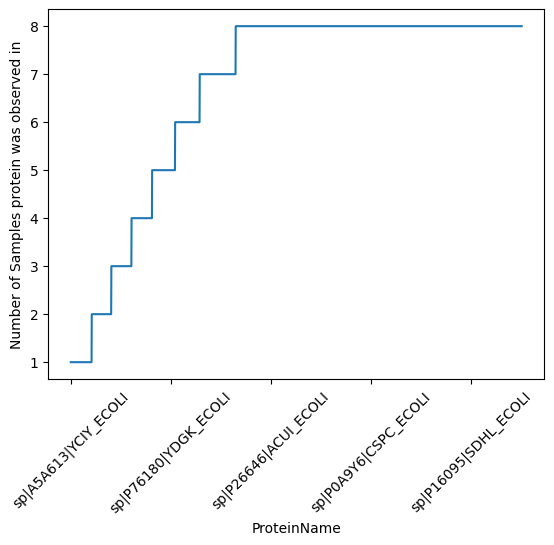

In [10]:
view_name = "Protein"
ax = (
    proteins.notna()
    .sum()
    .sort_values()
    .plot(
        rot=45,
        ylabel=f"Number of Samples {view_name.lower()} was observed in",
    )
)
ax.get_figure().savefig(
    out_dir_subsection / f"data_completeness_step_plot.png",
    bbox_inches="tight",
    dpi=300,
)

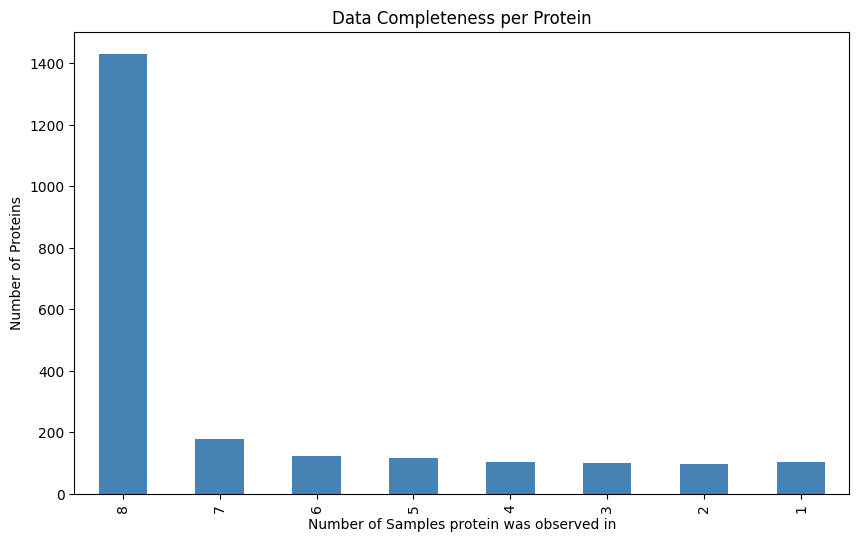

In [11]:
view_name = "Protein"
ax = (
    proteins.notna()
    .sum()
    .value_counts()
    .sort_index(ascending=False)
    .plot(
        kind="bar",
        title=f"Data Completeness per {view_name}",
        xlabel=f"Number of Samples {view_name.lower()} was observed in",
        ylabel=f"Number of {view_name}s",
        color="steelblue",
        figsize=(10, 6),
    )
)
ax.get_figure().savefig(
    out_dir_subsection / f"data_completeness_bar_plot.png",
    bbox_inches="tight",
    dpi=300,
)

And let's save a table with the data for inspection

In [12]:
proteins.to_csv(out_dir_subsection / "proteins.csv")

## Differential Regulation

In [13]:
out_dir_subsection = out_dir / "2_differential_regulation"
out_dir_subsection.mkdir(parents=True, exist_ok=True)

In [14]:
view = proteins
group = "label_suf"
diff_reg = acore.differential_regulation.run_anova(
    view.dropna(how="any", axis=1).join(label_suf),
    alpha=0.15,
    drop_cols=[],
    subject=None,
    group=group,
).sort_values("pvalue", ascending=True)
diff_reg["rejected"] = diff_reg["rejected"].astype(bool)
diff_reg.sort_values("pvalue")

,identifier,T-statistics,pvalue,mean_group1,mean_group2,std(group1),std(group2),log2FC,test,correction,padj,rejected,group1,group2,FC,-log10 pvalue,Method
"1,415",sp|Q46835|YGHG_ECOLI,-8.146,0.000,26.723,27.677,0.194,0.058,-0.954,t-Test,FDR correction BH,0.122,True,0,1,0.516,3.735,Unpaired t-test
109,sp|P08200|IDH_ECOLI,-7.568,0.000,28.755,29.455,0.069,0.145,-0.701,t-Test,FDR correction BH,0.122,True,0,1,0.615,3.558,Unpaired t-test
"1,308",sp|P75726|CILA_ECOLI,7.460,0.000,28.082,26.852,0.222,0.180,1.230,t-Test,FDR correction BH,0.122,True,0,1,2.345,3.524,Unpaired t-test
36,sp|P02943|LAMB_ECOLI,-7.006,0.000,26.117,27.920,0.428,0.124,-1.802,t-Test,FDR correction BH,0.122,True,0,1,0.287,3.375,Unpaired t-test
957,sp|P25539|RIBD_ECOLI,-6.995,0.000,26.877,27.188,0.064,0.044,-0.311,t-Test,FDR correction BH,0.122,True,0,1,0.806,3.371,Unpaired t-test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,sp|P0ABB0|ATPA_ECOLI,-0.003,0.998,31.305,31.305,0.319,0.051,-0.001,t-Test,FDR correction BH,0.999,False,0,1,1.000,0.001,Unpaired t-test
359,sp|P0A910|OMPA_ECOLI,0.003,0.998,31.854,31.850,1.709,1.471,0.003,t-Test,FDR correction BH,0.999,False,0,1,1.002,0.001,Unpaired t-test
25,sp|P00961|SYGB_ECOLI,-0.002,0.998,28.958,28.959,0.426,0.262,-0.001,t-Test,FDR correction BH,0.999,False,0,1,1.000,0.001,Unpaired t-test
405,sp|P0A9L3|FKBB_ECOLI,-0.002,0.998,30.452,30.453,0.433,0.106,-0.001,t-Test,FDR correction BH,0.999,False,0,1,1.000,0.001,Unpaired t-test


<Axes: title={'center': 'label_suf'}, xlabel='log2FC', ylabel='-log10 pvalue'>

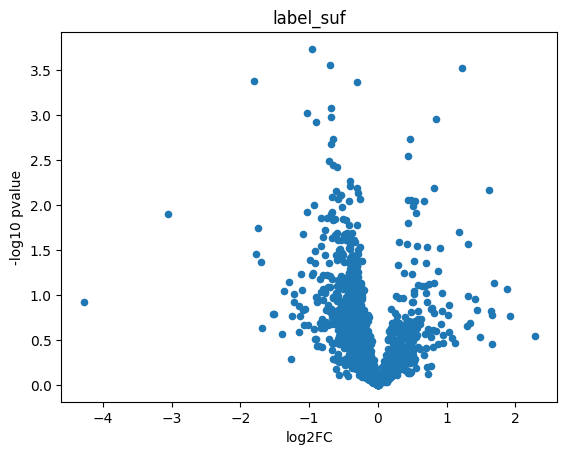

In [15]:
diff_reg.plot(x="log2FC", y="-log10 pvalue", kind="scatter", title=group)

## Interactive Volcano Plot

In [16]:
str_cols = diff_reg.dtypes[diff_reg.dtypes == "object"].index.tolist()
hover_data = {
    "rejected": ":.0f",
    **{
        c: ":.4f"
        for c in [
            "padj",
            "FC",
        ]
    },
    **{c: True for c in str_cols},
}
fig = px.scatter(
    diff_reg,
    x="log2FC",
    y="-log10 pvalue",
    color="rejected",
    hover_data=hover_data,
    width=1200,
    height=800,
    title=f"Volcano plot for {view_name}s",
)
fig

/Users/heweb/miniforge3/envs/phospho/lib/python3.12/site-packages/plotly/express/_core.py:1992: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


Save result to subsection folder
fig.write_json(
    out_dir_subsection / "0_volcano_plot.json",
    pretty=False,
)
diff_reg.to_csv(out_dir_subsection / "1_differential_regulation.csv")

## Check for Maltose Uptake

In [17]:
out_dir_subsection = out_dir / "3_maltose_uptake"
out_dir_subsection.mkdir(parents=True, exist_ok=True)

apply filtering of 'differentially abundant proteins' as described in the paper
> Differentially abundant proteins were determined as those with log2 fold-change
> > 1 and < -1, and p < 0.05
This means not multiple testing correction was applied.

In [18]:
view = diff_reg.query("pvalue < 0.05 and FC > 1")  # .shape[0]
view.to_csv(
    out_dir_subsection / "1_differently_regulated_as_in_paper.csv",
    index=False,
)
view

,identifier,T-statistics,pvalue,mean_group1,mean_group2,std(group1),std(group2),log2FC,test,correction,padj,rejected,group1,group2,FC,-log10 pvalue,Method
"1,308",sp|P75726|CILA_ECOLI,7.460,0.000,28.082,26.852,0.222,0.180,1.230,t-Test,FDR correction BH,0.122,True,0,1,2.345,3.524,Unpaired t-test
509,sp|P0ABK9|NRFA_ECOLI,5.844,0.001,26.482,25.637,0.166,0.187,0.845,t-Test,FDR correction BH,0.170,False,0,1,1.796,2.956,Unpaired t-test
"1,083",sp|P36943|EAEH_ECOLI,5.298,0.002,28.845,28.375,0.077,0.133,0.470,t-Test,FDR correction BH,0.219,False,0,1,1.386,2.737,Unpaired t-test
829,sp|P11349|NARH_ECOLI,4.853,0.003,27.360,26.919,0.142,0.068,0.441,t-Test,FDR correction BH,0.291,False,0,1,1.357,2.546,Unpaired t-test
"1,123",sp|P37773|MPL_ECOLI,4.073,0.007,27.739,26.922,0.117,0.327,0.817,t-Test,FDR correction BH,0.383,False,0,1,1.762,2.184,Unpaired t-test
"1,316",sp|P75825|HCP_ECOLI,4.041,0.007,26.998,25.384,0.455,0.521,1.614,t-Test,FDR correction BH,0.383,False,0,1,3.060,2.168,Unpaired t-test
"1,139",sp|P39285|MSCM_ECOLI,3.816,0.009,24.661,24.173,0.045,0.217,0.488,t-Test,FDR correction BH,0.383,False,0,1,1.402,2.055,Unpaired t-test
"1,029",sp|P31572|CAIB_ECOLI,3.809,0.009,25.399,24.967,0.119,0.156,0.431,t-Test,FDR correction BH,0.383,False,0,1,1.349,2.052,Unpaired t-test
"1,097",sp|P37349|DHAM_ECOLI,3.801,0.009,25.935,25.259,0.296,0.085,0.675,t-Test,FDR correction BH,0.383,False,0,1,1.597,2.048,Unpaired t-test
"1,360",sp|P76440|PRET_ECOLI,3.796,0.009,27.182,26.639,0.233,0.084,0.543,t-Test,FDR correction BH,0.383,False,0,1,1.457,2.045,Unpaired t-test


Let's find the proteins highlighted in the volcano plot in Figure 3.

In [19]:
highlighted_proteins = ["LamB", "MalE", "Malk", "CitF", "CitT", "CitE", "Frd"]
highlighted_proteins = "|".join([p.upper() for p in highlighted_proteins])

view  = diff_reg.query(f"`identifier`.str.contains('{highlighted_proteins}')")
view.to_csv(
    out_dir_subsection / "2_highlighted_proteins_in_figure3.csv",
    index=False,
)
view

,identifier,T-statistics,pvalue,mean_group1,mean_group2,std(group1),std(group2),log2FC,test,correction,padj,rejected,group1,group2,FC,-log10 pvalue,Method
36,sp|P02943|LAMB_ECOLI,-7.006,0.000,26.117,27.920,0.428,0.124,-1.802,t-Test,FDR correction BH,0.122,True,0,1,0.287,3.375,Unpaired t-test
700,sp|P0AEX9|MALE_ECOLI,-4.137,0.006,27.007,27.411,0.092,0.142,-0.403,t-Test,FDR correction BH,0.383,False,0,1,0.756,2.215,Unpaired t-test
397,sp|P0A9I1|CITE_ECOLI,3.145,0.020,28.211,27.029,0.528,0.381,1.183,t-Test,FDR correction BH,0.493,False,0,1,2.270,1.700,Unpaired t-test
655,sp|P0AE74|CITT_ECOLI,1.983,0.095,26.452,25.520,0.802,0.141,0.932,t-Test,FDR correction BH,0.662,False,0,1,1.908,1.024,Unpaired t-test
337,sp|P0A8Q0|FRDC_ECOLI,1.609,0.159,29.707,28.892,0.762,0.436,0.815,t-Test,FDR correction BH,0.705,False,0,1,1.760,0.799,Unpaired t-test
1,sp|P00363|FRDA_ECOLI,0.629,0.552,30.033,29.937,0.128,0.232,0.096,t-Test,FDR correction BH,0.925,False,0,1,1.069,0.258,Unpaired t-test
536,sp|P0AC47|FRDB_ECOLI,0.257,0.806,30.912,30.849,0.206,0.372,0.063,t-Test,FDR correction BH,0.965,False,0,1,1.045,0.094,Unpaired t-test


How to explain the differences?